In [1]:
!pip install mediapy torch torchvision

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


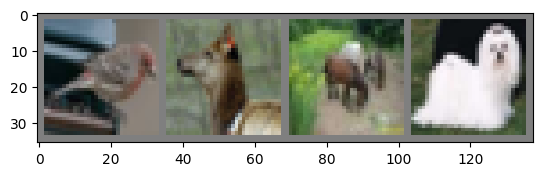

bird  deer  horse dog  


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
    

In [5]:
display(images[0].shape)

torch.Size([3, 32, 32])

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class AE(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 64)

        self.fc4 = nn.Linear(64, 84)
        self.fc5 = nn.Linear(84, 120)
        self.fc6 = nn.Linear(120, 6 * 32 * 32)
        self.conv3 = nn.Conv2d(6, 3, 5, padding=2)
        self.conv4 = nn.Conv2d(3, 3, 5, padding=2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # <---

        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = torch.reshape(x, (batch_size, 6, 32, 32))
        x = F.relu(self.conv3(x))
        x = self.conv4(x)
        return x


net = AE()

In [7]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, _ = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    PATH = f"./cifar_net_{epoch}.pth"
    torch.save(net.state_dict(), PATH)

print('Finished Training')

[1,  2000] loss: 0.253
[1,  4000] loss: 0.253
[1,  6000] loss: 0.252
[1,  8000] loss: 0.250
[1, 10000] loss: 0.251
[1, 12000] loss: 0.252
[2,  2000] loss: 0.253
[2,  4000] loss: 0.251
[2,  6000] loss: 0.251
[2,  8000] loss: 0.251
[2, 10000] loss: 0.250
[2, 12000] loss: 0.249
[3,  2000] loss: 0.248
[3,  4000] loss: 0.249
[3,  6000] loss: 0.248
[3,  8000] loss: 0.252
[3, 10000] loss: 0.253
[3, 12000] loss: 0.249
[4,  2000] loss: 0.247
[4,  4000] loss: 0.250
[4,  6000] loss: 0.246
[4,  8000] loss: 0.248
[4, 10000] loss: 0.247
[4, 12000] loss: 0.245
[5,  2000] loss: 0.201
[5,  4000] loss: 0.190
[5,  6000] loss: 0.170
[5,  8000] loss: 0.153
[5, 10000] loss: 0.140
[5, 12000] loss: 0.135
[6,  2000] loss: 0.125
[6,  4000] loss: 0.120
[6,  6000] loss: 0.116
[6,  8000] loss: 0.112
[6, 10000] loss: 0.108
[6, 12000] loss: 0.105
[7,  2000] loss: 0.102
[7,  4000] loss: 0.100
[7,  6000] loss: 0.097
[7,  8000] loss: 0.096
[7, 10000] loss: 0.095
[7, 12000] loss: 0.094
[8,  2000] loss: 0.092
[8,  4000] 

KeyboardInterrupt: 

In [11]:
PATH = './cifar_net_28.pth'
# torch.save(net.state_dict(), PATH)
net = AE()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

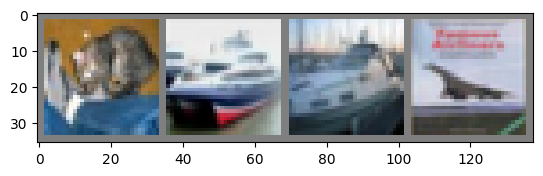

./cifar_net_0.pth


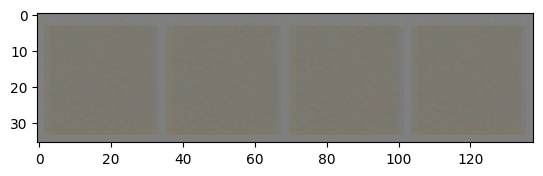

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./cifar_net_5.pth


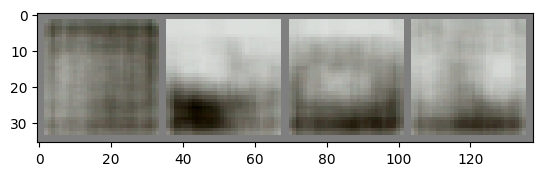

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./cifar_net_10.pth


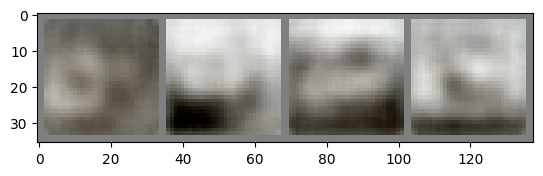

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./cifar_net_15.pth


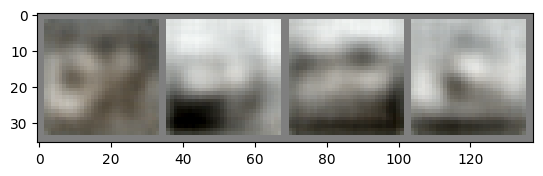

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./cifar_net_20.pth


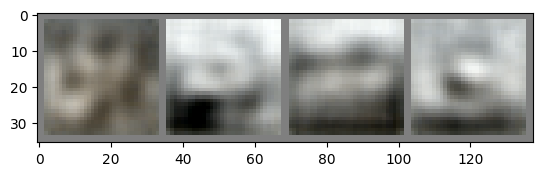

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./cifar_net_25.pth


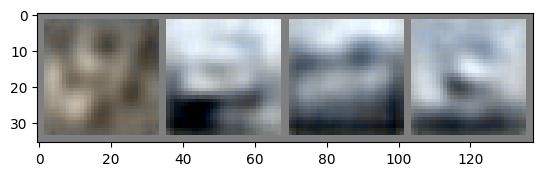

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./cifar_net_30.pth


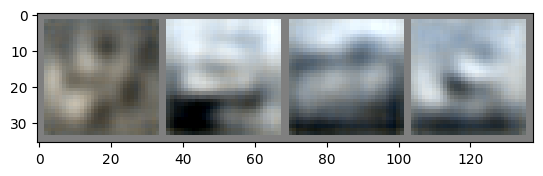

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./cifar_net_35.pth


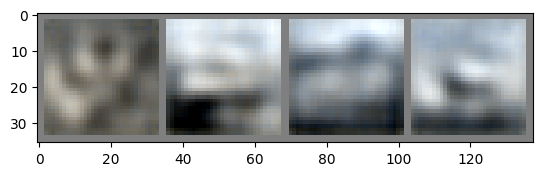

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./cifar_net_40.pth


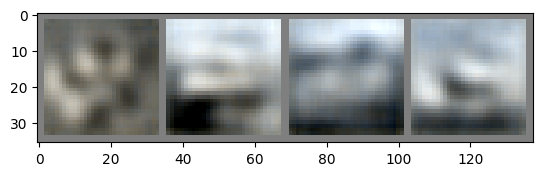

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./cifar_net_45.pth


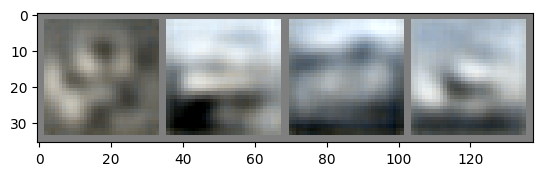

In [21]:
dataiter = iter(testloader)
images, labels = next(dataiter)


imshow(torchvision.utils.make_grid(images))
for i in range(10):
    epoch = i * 5;
    path = f'./cifar_net_{epoch}.pth'
    print(f"{path}")
    net.load_state_dict(torch.load(path))
    imshow(torchvision.utils.make_grid(net(images)))


In [ ]:
imshow(torchvision.utils.make_grid(net(images)))